>> ## Data Breach Analytics 2005 - 2017 
> (Part IV - Supervised Text Classification Modeling - Descriptions)
#### by Miriam Rodriguez 

## Text Preprocessing and Feature Generation 

# Descriptive Analytics on Incident Descriptions

In [24]:
import warnings
warnings.filterwarnings(action= 'ignore')  # To ignore all warnings that arise here to enhance clarity

In [2]:
%matplotlib inline
import nltk
import matplotlib.pyplot as plt
import csv
import pandas as pd
import sklearn
import numpy as np
from collections import Counter

# feature engineering (words to vectors)
from sklearn.feature_extraction.text import TfidfVectorizer

# classification algorithms (or classifiers)
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC

# build a pipeline
from sklearn.pipeline import Pipeline

# model evaluation, validation
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#pip install scikit-plot 
import scikitplot as skplt


In [3]:
#import breach data ... open or read the breach data
df = pd.read_csv("databreach_cleaned.csv")
df.head(2)

,Breach_Year,Company,State,Breach_Type,Organization_Type,Total_Recs,Description,Latitude,Longitude,Breach_Type_CAT,Organization_Type_CAT,State_CAT,Year_CAT,GDP
0,2006,"Deloitte & Touche, McAfee",United States,PORT,BSO,9290,"An external auditor lost a CD with names, Soci...",37.090240,-95.712891,5,2,0,2,72466970
1,2007,"TennCare, Americhoice Inc.",United States,PORT,MED,67000,"There are 67,000 TennCare \r\n enro...",35.960638,-83.920739,5,6,0,3,75725457


In [4]:
df_breaches = df[["Description", "Breach_Type"]]
df_breaches.head(2)

,Description,Breach_Type
0,"An external auditor lost a CD with names, Soci...",PORT
1,"There are 67,000 TennCare \r\n enro...",PORT


In [5]:
df_breaches.to_csv('databreach_class.csv', index=False, header=None)

In [6]:
# first column
breach_data = []
# second colummn
breach_labels = []
# both columns
breaches = []

openfile = open('databreach_class.csv', 'rb')

r = csv.reader(openfile)

for i in r:
    breaches.append(i)
    breach_data.append(i[0])
    breach_labels.append(i[1])
    
openfile.close()

In [7]:
#entire data
print len(breaches)
#texts only
print len(breach_data)
#labels only
print len(breach_labels)

8177
8177
8177


In [57]:
print breach_labels.count('CARD')
print breach_labels.count('PHYS') 
print breach_labels.count('PORT') 
print breach_labels.count('HACK')  
print breach_labels.count('DISC')  
print breach_labels.count('STAT')  
print breach_labels.count('INSD')  
print breach_labels.count('UNKN')  


68
1691
1172
2431
1708
249
609
249


In [8]:
# view first row
breaches[:1]

[['An external auditor lost a CD with names, Social Security numbers and stock holdings in McAfee of current and former McAfee employees.\xc2\xa0 Three thousand current employees and 6,000 former employees were affected.\xc2\xa0 Current and former employees received two years of free credit monitoring services from Equifax.',
  'PORT']]

In [9]:
tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore')
tfidf = tfidf_vectorizer.fit_transform(breach_data)
print tfidf.shape
print tfidf


(8177, 16219)
  (0, 2493)	0.060314324258
  (0, 6556)	0.143551801273
  (0, 2915)	0.189364070114
  (0, 9491)	0.124730164997
  (0, 3999)	0.182044031855
  (0, 16003)	0.0707622087161
  (0, 10343)	0.0519451279513
  (0, 13719)	0.0541928937298
  (0, 13287)	0.0496412338524
  (0, 10653)	0.0490068498692
  (0, 2509)	0.146089761614
  (0, 14058)	0.207889865599
  (0, 7850)	0.202413302435
  (0, 8184)	0.0517934983778
  (0, 9783)	0.502682468579
  (0, 10767)	0.0637640923781
  (0, 5068)	0.334656319565
  (0, 6981)	0.284454952703
  (0, 6160)	0.347144397182
  (0, 14678)	0.125048891812
  (0, 14669)	0.184571724076
  (0, 1)	0.0922331931656
  (0, 15862)	0.0567680166376
  (0, 2218)	0.0690384137876
  (0, 12346)	0.117582702848
  :	:
  (8174, 8599)	0.116319726827
  (8174, 13820)	0.133303412349
  (8174, 9946)	0.432056774612
  (8174, 14558)	0.432056774612
  (8174, 1450)	0.144018924871
  (8175, 10767)	0.151789135187
  (8175, 8340)	0.157599763968
  (8175, 3727)	0.285878721632
  (8175, 9419)	0.290790833163
  (8175, 3568)

In [10]:
# removing stopwords

tfidf_vectorizer = TfidfVectorizer(decode_error ='ignore', stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(breach_data)
print tfidf.shape
print tfidf

(8177, 15940)
  (0, 6475)	0.155764154164
  (0, 2885)	0.205473800738
  (0, 9361)	0.135341308693
  (0, 3945)	0.197531026369
  (0, 10196)	0.0563642451471
  (0, 13521)	0.0588032346418
  (0, 13103)	0.053864352339
  (0, 10494)	0.0531759995376
  (0, 13852)	0.225575637415
  (0, 7738)	0.219633167718
  (0, 9649)	0.545447070931
  (0, 5011)	0.36312646787
  (0, 6089)	0.376676941148
  (0, 14441)	0.20027375643
  (0, 1)	0.100079728655
  (0, 2215)	0.0749117045769
  (0, 12163)	0.127585791965
  (0, 15870)	0.137110973407
  (0, 6965)	0.13443772504
  (0, 4917)	0.0869892162545
  (0, 10042)	0.131774596254
  (0, 13201)	0.0983887113793
  (0, 6233)	0.22346399514
  (1, 9361)	0.391017863929
  (1, 10196)	0.0814216551928
  :	:
  (8174, 15441)	0.211897835815
  (8174, 7800)	0.388787627329
  (8174, 5903)	0.125949046743
  (8174, 7484)	0.131778175721
  (8174, 8478)	0.122969370463
  (8174, 13615)	0.140923961432
  (8174, 9811)	0.456756141263
  (8174, 14348)	0.456756141263
  (8174, 1450)	0.152252047088
  (8175, 8221)	0.1660

In [11]:
# view features or terms

tfidf_vectorizer.get_feature_names()

[u'00',
 u'000',
 u'0004',
 u'0008',
 u'00081',
 u'001',
 u'0019',
 u'00191',
 u'0033',
 u'004',
 u'005',
 u'0052',
 u'00561',
 u'00577',
 u'006',
 u'0069',
 u'007',
 u'008',
 u'0083',
 u'009',
 u'00am',
 u'00pm',
 u'01',
 u'012',
 u'01262',
 u'013',
 u'0139',
 u'0142',
 u'015',
 u'015saint',
 u'016',
 u'01617',
 u'017',
 u'0171',
 u'018',
 u'01887',
 u'019',
 u'02',
 u'020',
 u'0202',
 u'0217',
 u'0218',
 u'023',
 u'024',
 u'025',
 u'026',
 u'027',
 u'0281',
 u'02811',
 u'029',
 u'0299',
 u'02991',
 u'03',
 u'031',
 u'034',
 u'035',
 u'036',
 u'0374',
 u'03741',
 u'0379',
 u'038',
 u'0382',
 u'04',
 u'041',
 u'042',
 u'044',
 u'0447',
 u'0448',
 u'046',
 u'047',
 u'049',
 u'05',
 u'050',
 u'0529',
 u'054',
 u'055',
 u'058',
 u'059',
 u'06',
 u'060',
 u'062',
 u'0628',
 u'06281',
 u'063',
 u'067',
 u'06749',
 u'069',
 u'07',
 u'071',
 u'0710',
 u'072',
 u'074',
 u'075',
 u'076',
 u'0761',
 u'078',
 u'079',
 u'0796',
 u'08',
 u'080',
 u'082',
 u'085',
 u'087',
 u'088',
 u'0888',
 u'0888

In [12]:
# which term has the vector value 2000

tfidf_vectorizer.get_feature_names()[2000]

u'accophonesunt'

In [13]:
# which terms are vector 1122, 2124, 3125?

from operator import itemgetter
itemgetter(1122,2124,2125)(tfidf_vectorizer.get_feature_names())

(u'581', u'adhesive', u'adhs')

### Document-Term Matrix (DTM) This is a matrix view of documents (rows), tokens (columns), and their counts.

In [14]:
# document-term matrix using tfidf

tfidf_matrix = tfidf_vectorizer.fit_transform(breach_data).toarray()
print tfidf_matrix

[[ 0.          0.10007973  0.         ...,  0.          0.          0.        ]
 [ 0.          0.14457139  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [15]:
# Document Term Matrix
pd.DataFrame(tfidf_matrix,index=breach_data,columns=tfidf_vectorizer.get_feature_names()).head()

,00,000,0004,0008,00081,001,0019,00191,0033,004,...,zoo,zoos,zotec,zpizza,zuckerberg,zurich,zybez,zymo,œadpâ,œinspireâ
"An external auditor lost a CD with names, Social Security numbers and stock holdings in McAfee of current and former McAfee employees. Three thousand current employees and 6,000 former employees were affected. Current and former employees received two years of free credit monitoring services from Equifax.",0.0,0.100080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"There are 67,000 TennCare \r\r\n enrollees at risk of identity theft after a courier service lost their \r\r\n personal information. The lost information includes names, Social \r\r\n Security Numbers, birthdays and addresses.",0.0,0.144571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A laptop computer was stolen from a vehicle.,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"A Fidelity laptop used by a former Fidelity employee was discarded and recovered by a non-affiliated person. The employee had taken the laptop home after believing it had been decommissioned from business use by Fidelity. Participants and beneficiaries of participants in the Dairy Farmers of America Defined Benefit plan had their names and Social Security numbers exposed. At least 69 New York residents were affected by the breach, but the total number of affected individuals nationwide was not revealed.",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"A former contract worker of a Japanese commercial printing company stole nearly 9 million pieces of private data on customers from 43 clients, including U.S. companies. The stolen data includes confidential information such as names, addresses and credit card numbers intended for use in direct mailing and other printing services. Customers of U.S.-based American Home Assurance Co. and Toyota Motor were affected.",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Split dataset into Training and Testing Dataset in order to Validate model

In [16]:
x_train, x_test, y_train, y_test = train_test_split(breach_data, breach_labels, test_size=0.3, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(5723, 5723, 2454, 2454)

In [63]:
# 5723 documents (training dataset)
x_train[:2], y_train[:2]

(['Due to a misaligned spreadsheet, on or about February 19, 2016, Executive Services, a business associate (BA) of the covered entity (CE), Bozeman Health Deaconess Hospital, erroneously sent letters to 1,124 patients containing the another patient\xe2\x80\x99s name.  The type of protected health information (PHI) involved in the breach included names.  The CE provided breach notification to HHS, affected individuals, and the media.  Following the breach, the CE implemented a new process for sending mass mailings, required the responsible employee, as well as managers and supervisors, to attend HIPAA refresher training, and required the responsible employee to take a class on specific spreadsheet software. OCR obtained assurances that the CE implemented the corrective actions noted above.\r\r\nLocation of breached information: Paper/Films\r\r\nBusiness associate present: No\r\r\n',
  'Hundreds of people in Brevard County \r\r\n          found out their personal information was stolen.

## Build model in training dataset and make predictions in test dataset.

In [18]:
X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)
print X_train[:2]
print "+++++++++++++++++++++++++++++++++++++++++"
print X_test

  (0, 8353)	0.189966627624
  (0, 11588)	0.241970979541
  (0, 5592)	0.0951952198896
  (0, 261)	0.110177645092
  (0, 334)	0.0917421457978
  (0, 5380)	0.146751036928
  (0, 11166)	0.0711805920194
  (0, 3049)	0.0948980931056
  (0, 2306)	0.0978211438776
  (0, 2476)	0.106783327787
  (0, 4070)	0.0721518032128
  (0, 5217)	0.0725599895149
  (0, 3286)	0.292823840111
  (0, 2877)	0.198971367212
  (0, 6394)	0.113040756312
  (0, 4324)	0.178621997409
  (0, 6573)	0.0941809605108
  (0, 5267)	0.141169740446
  (0, 11132)	0.0787377393867
  (0, 7697)	0.105426666641
  (0, 156)	0.174572923623
  (0, 9277)	0.0680048948178
  (0, 3894)	0.0706932403534
  (0, 9275)	0.0706244835789
  (0, 12554)	0.113465670581
  :	:
  (0, 8910)	0.0667592363611
  (0, 8880)	0.0766615566367
  (0, 2316)	0.0878416238733
  (0, 4009)	0.0853088089013
  (0, 1667)	0.0871086061647
  (0, 8778)	0.12704543453
  (0, 7826)	0.0484252622441
  (0, 2913)	0.0473044442812
  (0, 9197)	0.0768424816326
  (0, 5654)	0.0814712985047
  (0, 9787)	0.0487049369472


## Multinomial Naive Bayes Classifier

In [19]:
nb = MultinomialNB().fit(X_train, y_train)

predicted = nb.predict(X_test)
np.mean(predicted == y_test)  

0.63691931540342295

In [20]:
predicted

array(['HACK', 'HACK', 'PHYS', ..., 'PHYS', 'PORT', 'HACK'],
      dtype='|S4')

In [58]:
print y_test

['PORT', 'HACK', 'PHYS', 'PORT', 'DISC', 'INSD', 'DISC', 'DISC', 'PHYS', 'INSD', 'HACK', 'HACK', 'HACK', 'PHYS', 'HACK', 'INSD', 'DISC', 'DISC', 'UNKN', 'PORT', 'PORT', 'DISC', 'INSD', 'STAT', 'HACK', 'HACK', 'HACK', 'PORT', 'PORT', 'DISC', 'DISC', 'PHYS', 'PHYS', 'PORT', 'DISC', 'HACK', 'HACK', 'PORT', 'HACK', 'PHYS', 'PORT', 'UNKN', 'HACK', 'HACK', 'PHYS', 'PHYS', 'PORT', 'HACK', 'HACK', 'UNKN', 'INSD', 'DISC', 'PHYS', 'HACK', 'PHYS', 'DISC', 'HACK', 'PORT', 'PORT', 'PORT', 'DISC', 'HACK', 'HACK', 'DISC', 'HACK', 'PHYS', 'DISC', 'HACK', 'INSD', 'PHYS', 'HACK', 'PHYS', 'HACK', 'HACK', 'PORT', 'PHYS', 'HACK', 'HACK', 'PORT', 'CARD', 'PORT', 'HACK', 'PORT', 'HACK', 'PHYS', 'HACK', 'HACK', 'HACK', 'PORT', 'PORT', 'INSD', 'HACK', 'PORT', 'PHYS', 'PHYS', 'PHYS', 'HACK', 'PHYS', 'PORT', 'HACK', 'PHYS', 'UNKN', 'PHYS', 'PHYS', 'DISC', 'DISC', 'DISC', 'INSD', 'HACK', 'DISC', 'STAT', 'HACK', 'PHYS', 'HACK', 'PHYS', 'UNKN', 'HACK', 'HACK', 'HACK', 'PHYS', 'PORT', 'HACK', 'HACK', 'PHYS', 'PHYS',

## Model Performance Evaluation

In [22]:
print '\n overall accuracy:'
print metrics.accuracy_score(y_test, predicted)

print '\n confusion_matrix:'
print metrics.confusion_matrix(y_test, predicted)

print '\n Here is the classification report:'
print metrics.classification_report(y_test, predicted)


 overall accuracy:
0.636919315403

 confusion_matrix:
[[  0   0  15   3   0   0   0   0]
 [  0 149 200   0 153   2   0   0]
 [  0   4 694   0  47   1   0   0]
 [  0  12 102  35  11   5   0   0]
 [  0  21  50   3 421  28   0   0]
 [  0   3  56   0  28 264   0   0]
 [  0   1  21   0  13  38   0   0]
 [  0   2  45   1  22   4   0   0]]

 Here is the classification report:
             precision    recall  f1-score   support

       CARD       0.00      0.00      0.00        18
       DISC       0.78      0.30      0.43       504
       HACK       0.59      0.93      0.72       746
       INSD       0.83      0.21      0.34       165
       PHYS       0.61      0.80      0.69       523
       PORT       0.77      0.75      0.76       351
       STAT       0.00      0.00      0.00        73
       UNKN       0.00      0.00      0.00        74

avg / total       0.63      0.64      0.59      2454



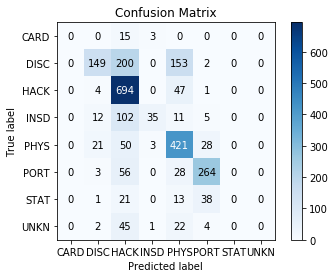

In [25]:
from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y_test), y_pred=predicted)
plt.show()

Results:
- Overall accuracy = 0.636919315403
- Highest accuracy shows 'Hack' with 694 correct classifications
- Next highest is 'Phys' with 421 correct classifications, then 'PORT' with 264.
- 200 were miscalculated as Hack when they should have been DISC. 153 were miscategorized as 'PHYS' when should be 'DISC'.

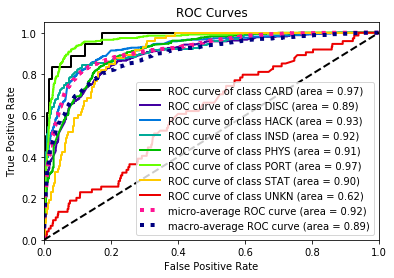

In [26]:
probas = nb.predict_proba(X_test)
skplt.plot_roc_curve(y_true=y_test, y_probas=probas)
plt.show()

### Explanation of the ROC Curves: The steeper the curve the more accurate it is.
- The highest accuracy is shown by the CARD and PORT breach types, followed by HACK.
- The lowest accuracy is shown by the UNKN breach type. 
- This is a better model than the above.

In [27]:
def most_informative_feature_for_binary_classification(vectorizer, classifier, n=50):
    
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print "========================================="

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binary_classification(tfidf_vectorizer, nb, n=10)


('CARD', -9.5277792586781498, u'00')
('CARD', -9.5277792586781498, u'0008')
('CARD', -9.5277792586781498, u'00081')
('CARD', -9.5277792586781498, u'001')
('CARD', -9.5277792586781498, u'0019')
('CARD', -9.5277792586781498, u'00191')
('CARD', -9.5277792586781498, u'004')
('CARD', -9.5277792586781498, u'005')
('CARD', -9.5277792586781498, u'0052')
('CARD', -9.5277792586781498, u'00577')
('DISC', -7.7578659687455707, u'card')
('DISC', -7.8942422538206918, u'cards')
('DISC', -7.9093519483942281, u'credit')
('DISC', -7.9972214849419805, u'skimming')
('DISC', -8.1588750831198524, u'debit')
('DISC', -8.2092772839320389, u'charges')
('DISC', -8.280393850214228, u'customers')
('DISC', -8.2918761388905295, u'fraudulent')
('DISC', -8.2995785448284423, u'gas')
('DISC', -8.3705592419072161, u'device')


#### The bottom 10 show the positive predictors, the upper 10 show the 10 values for the lowest negative.
- **higher values mean more important features for the positive class**
- **lower values mean more information features for the negative class**


### Building Pipeline Classification

In [28]:
# combining feature engineering and model building
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', MultinomialNB())])

In [29]:
nb_pipeline = nb_pipeline.fit(x_train, y_train)
nb_pipeline

Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error='ignore',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [30]:
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)  

0.61532192339038305

### Improve the NB model

In [64]:
# removing stopwords & rare words

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', min_df=2)), ('clf', MultinomialNB())])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test)  

0.66462917685411571

### kNeighbors Classifier (kNN) 

In [66]:
knn_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', KNeighborsClassifier())])
knn_pipeline = knn_pipeline.fit(x_train, y_train)
predicted = knn_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.68052159739201301

## SVM (Support Vector Machine) to get prediction rate and evaluate.

SVM is a supervised machine learning algorithm that uses a technique called the kernel trick to transform data. With these transformations finds an optimal boundary between the possible outputs.

In [32]:
import timeit
start_time = timeit.default_timer()

svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)

print np.mean(predicted == y_test)


elapsed = timeit.default_timer() - start_time
print "%s %s" % ("this processing has taken", elapsed)

0.783211083945
this processing has taken 83.9241939891


### Improve the SVM model

In [71]:
svm_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))), ('clf', SVC(kernel='linear', probability=True))])
svm_pipeline = svm_pipeline.fit(x_train, y_train)
predicted = svm_pipeline.predict(x_test)
np.mean(predicted == y_test)

0.78321108394458028

### SVM with tfidf has the best model for this data. The improvement did not improve the model.

## Grid Search

In [33]:
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english')), ('clf', MultinomialNB())])

In [34]:
parameters = {'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],
              'tfidf__min_df': [1, 2, 5],
              'tfidf__max_df': [0.9, 0.8, 0.7],
              'clf__alpha': (0.01, 0.001, 1),
}

In [35]:
gs_clf = GridSearchCV(nb_pipeline, parameters, n_jobs=6,verbose=10)
gs_clf.fit(x_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   18.2s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   24.7s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   31.9s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   37.7s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   47.1s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   56.9s
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 101 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 116 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 133 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 169 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  3.4min
[Parallel(n_jobs=6)]: Do

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error='ignore',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True...rue,
        vocabulary=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))]),
       fit_params=None, iid=True, n_jobs=6,
       param_grid={'tfidf__max_df': [0.9, 0.8, 0.7], 'clf__alpha': (0.01, 0.001, 1), 'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)], 'tfidf__min_df': [1, 2, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=10)

In [86]:
gs_clf.best_score_

0.71745587978333047

In [87]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))

clf__alpha: 0.01
tfidf__max_df: 0.9
tfidf__min_df: 5
tfidf__ngram_range: (1, 2)


#### Using above values

In [88]:
nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=5, 
                                                  ngram_range=(1,2), max_df=0.9)), 
                        ('clf', MultinomialNB(alpha=0.01))])
nb_pipeline = nb_pipeline.fit(x_train, y_train)
predicted = nb_pipeline.predict(x_test)
np.mean(predicted == y_test) 

0.71760391198044005

In [89]:
# 10 fold cross validation from data  

nb_pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=5, 
                                                  ngram_range=(1,2), max_df=0.9)), 
                        ('clf', MultinomialNB(alpha=0.01))])

nb_pipeline = nb_pipeline.fit(breach_data, breach_labels)

scores = cross_val_score(nb_pipeline, breach_data, breach_labels, scoring='accuracy', cv=10)
print scores
print scores.mean()

[ 0.727162    0.6984127   0.73105134  0.71393643  0.70293399  0.72493888
  0.72371638  0.71393643  0.71568627  0.72693727]
0.717871168729


In [90]:
# since we know the parameters for the best NB model, let's initialize TfidfVectorizer again 

tfidf_vectorizer = TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=5, ngram_range=(1,2), max_df=0.9)

In [91]:
x_train, x_test, y_train, y_test = train_test_split(breach_data, breach_labels, test_size=0.3, random_state=0)
len(x_train), len(y_train), len(x_test), len(y_test)

(5723, 5723, 2454, 2454)

In [92]:
# transform training data and testing data to tfidf format 

X_train = tfidf_vectorizer.fit_transform(x_train)
X_test = tfidf_vectorizer.transform(x_test)

In [93]:
# now we have more vectors due to bi-grams
print X_train.shape
print X_test.shape

(5723, 8753)
(2454, 8753)


In [94]:
print tfidf_vectorizer.get_feature_names()[0:5]
print tfidf_vectorizer.get_feature_names()[-5:]

[u'00', u'00 00', u'00 pm', u'000', u'000 accounts']
[u'zdnet', u'zdnet com', u'zero', u'zip', u'zip codes']


In [95]:
nb = MultinomialNB().fit(X_train, y_train)

predicted = nb.predict(X_test)
np.mean(predicted == y_test)  

0.68581907090464544

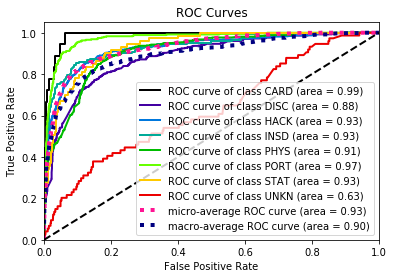

In [96]:
probas = nb.predict_proba(X_test)
skplt.plot_roc_curve(y_true=y_test, y_probas=probas)
plt.show()

### Scores for ROC are higher using Grid Search parameters

In [97]:
def most_informative_feature_for_binanry_classification(vectorizer, classifier, n=50):
    
    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print "========================================="

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


most_informative_feature_for_binanry_classification(tfidf_vectorizer, nb, n=10)

('CARD', -9.109494075200665, u'00')
('CARD', -9.109494075200665, u'00 00')
('CARD', -9.109494075200665, u'00 pm')
('CARD', -9.109494075200665, u'000 accounts')
('CARD', -9.109494075200665, u'000 clients')
('CARD', -9.109494075200665, u'000 consumers')
('CARD', -9.109494075200665, u'000 credit')
('CARD', -9.109494075200665, u'000 current')
('CARD', -9.109494075200665, u'000 customers')
('CARD', -9.109494075200665, u'000 employees')
('DISC', -7.3866467103988009, u'card')
('DISC', -7.5186874460289994, u'cards')
('DISC', -7.5419120039186662, u'credit')
('DISC', -7.6258177758892334, u'skimming')
('DISC', -7.7892034452818004, u'debit')
('DISC', -7.7913729409996959, u'credit card')
('DISC', -7.8335553662505539, u'charges')
('DISC', -7.9004282505356365, u'customers')
('DISC', -7.9205806763201725, u'skimming device')
('DISC', -7.9302465228916219, u'fraudulent')


In [98]:
classifiers = [MultinomialNB(), KNeighborsClassifier(), SVC(kernel='linear', probability=True)]

In [101]:
for clf in classifiers:
    #pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore', stop_words='english', ngram_range=(1, 2))), 
    #                     ('clf', clf)])
    pipeline = Pipeline([('tfidf', TfidfVectorizer(decode_error='ignore', stop_words='english', min_df=5, 
                                                  ngram_range=(1,2), max_df=0.9)), 
                         ('clf', clf)])                    
    #                    ('clf', MultinomialNB(alpha=0.01))])

    classifiers_pipeline = pipeline.fit(x_train, y_train)
    predicted = classifiers_pipeline.predict(x_test)
    print "%s --> %s" % (clf, np.mean(predicted == y_test))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) --> 0.685819070905
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') --> 0.665444172779
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False) --> 0.784433577832


## Deploying to best Model

## SVM is the best model to use  

In [50]:
breaches_score = df_breaches.drop(['Breach_Type'], axis=1)
breaches_score.head()

,Description
0,"An external auditor lost a CD with names, Soci..."
1,"There are 67,000 TennCare \r\n enro..."
2,A laptop computer was stolen from a vehicle.
3,A Fidelity laptop used by a former Fidelity em...
4,A former contract worker of a Japanese commerc...


In [51]:
breaches_score.to_csv("breachscoring.csv",index=False, header=None)

In [52]:
# reading unlabeled data for classification

docs_new = []

openfile = open('breachscoring.csv', 'rb')

r = csv.reader(openfile)

for i in r:
    docs_new.append(i[0])
    
openfile.close()



In [53]:
unlabeled_tfidf = Pipeline([('tfidf', TfidfVectorizer(decode_error ='ignore')), ('clf', SVC(kernel='linear', probability=True))])
unlabeled_tfidf = unlabeled_tfidf.fit(x_train, y_train)
predicted = unlabeled_tfidf.predict(x_test)

In [54]:
# print the resulting model fit

for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, category))

'An external auditor lost a CD with names, Social Security numbers and stock holdings in McAfee of current and former McAfee employees.\xc2\xa0 Three thousand current employees and 6,000 former employees were affected.\xc2\xa0 Current and former employees received two years of free credit monitoring services from Equifax.' => PORT
'There are 67,000 TennCare \r\r\n            enrollees at risk of identity theft after a courier service lost their \r\r\n            personal information. The lost information includes names, Social \r\r\n            Security Numbers, birthdays and addresses.' => HACK
'A laptop computer was stolen from a vehicle. \xc2\xa0' => PHYS
'A Fidelity laptop used by a former Fidelity employee was discarded and recovered by a non-affiliated person. The employee had taken the laptop home after believing it had been decommissioned from business use by Fidelity. Participants and beneficiaries of participants in the Dairy Farmers of America Defined Benefit plan had their 

'Location of breached information: Other Portable Electronic Device\r\r\nBusiness associate present: No\r\r\n' => PHYS
'Malware was installed by cyber-intruders into PrognoCIS, the medical records system of the business associate (BA), Bizmatics, Inc.  The breach affected approximately 2,473 individuals who were patients of the covered entity (CE), Lee Rice D.O. Medical Corporation d/b/a Lifewellness Institute.  The types of protected health information (PHI) involved included full names, addresses, dates of birth, phone numbers, sex, marital status, social security numbers, claims information, diagnoses/conditions, lab results, and medications.  The CE provided breach notification to HHS, affected individuals, and the media and also provided substitute notice.  In response to the breach, the BA notified and cooperated with the FBI in its investigation.  In addition, the BA consulted with an independent cyber-security firm to assess the extent of the breach and to implement additional 

In [55]:
print '\n overall accuracy:'
print metrics.accuracy_score(y_test, predicted)

print '\n confusion_matrix:'
print metrics.confusion_matrix(y_test, predicted)

print '\n Here is the classification report:'
print metrics.classification_report(y_test, predicted)


 overall accuracy:
0.783211083945

 confusion_matrix:
[[  8   0   8   2   0   0   0   0]
 [  0 354  59   1  88   1   0   1]
 [  2  66 646   8  20   2   2   0]
 [  0  16  12 127   7   3   0   0]
 [  0  40  18   7 429  27   2   0]
 [  0   2   6   3  14 316   9   1]
 [  0   2   5   0   5  23  38   0]
 [  2  20  26   3  14   4   1   4]]

 Here is the classification report:
             precision    recall  f1-score   support

       CARD       0.67      0.44      0.53        18
       DISC       0.71      0.70      0.71       504
       HACK       0.83      0.87      0.85       746
       INSD       0.84      0.77      0.80       165
       PHYS       0.74      0.82      0.78       523
       PORT       0.84      0.90      0.87       351
       STAT       0.73      0.52      0.61        73
       UNKN       0.67      0.05      0.10        74

avg / total       0.78      0.78      0.77      2454



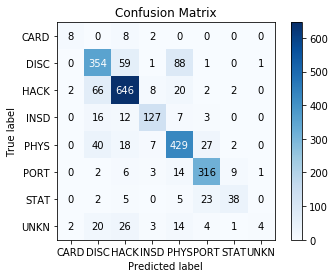

In [56]:
from scikitplot import plotters as skplt

skplt.plot_confusion_matrix(y_true=np.array(y_test), y_pred=predicted)
plt.show()

### There is a definite improvement over the other models 

Results:
- Overall accuracy = 0.783211083945
- Highest accuracy shows 'Hack' with 646 correct classifications
- Next highest is 'Phys' with 429 correct classifications, then 'DISC' with 354 and PORT with 316.